<a href="https://colab.research.google.com/github/HenriqueBrainer/Mackenzie/blob/main/Lab_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">


# Lab: Matplotlib

Referências e Materiais úteis para este Lab:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="40%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

Acesse o capítulo [Gráficos com Matplotlib](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c2_parte_1.html)

<br>

Para saber mais:
- Veja no livro muito mais sobre o `Matplotlib`.

- Você também pode acessar diretamente as bibliotecas do `Matplotlib`

  - https://matplotlib.org/

  - https://matplotlib.org/stable/tutorials/index.html

  - https://matplotlib.org/stable/gallery/index.html


---



# Basic imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Exercício 1

Produza um gráfico de linha para uma função matemática de sua escolha.

1. Inclua um título com a função
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

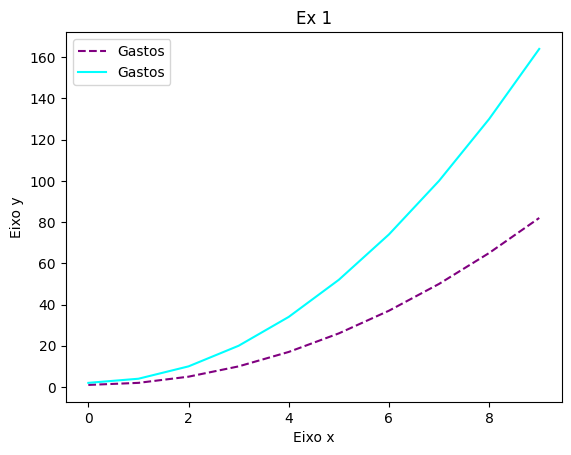

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def f(x):
  return x**2 + 1

x = np.arange(0,10,1) # o mesmo que x = np.array([0,1,2,3,4,5,6,7,8,9])
y = f(x)

plt.plot(x ,y, label='Gastos', linestyle='dashed', color='purple')
plt.plot(x ,y*2, label='Gastos', color='cyan')
plt.legend()
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title("Ex 1")
plt.show()


# Exercício 2

O código abaixo retorna os `day_before` valores do bitcoin US anteriores a data `last_date`. Você pode alterar o ativo, a data e o número de dias para obter outros dados.

In [ ]:
#@markdown install yahoofinancials
%%capture
!pip install yfinance
!pip install yahoofinancials

In [ ]:
stock_name = 'BTC-USD'
last_date = "2023-02-22"
days_before = 30

In [ ]:
#@markdown get stock data
from yahoofinancials import YahooFinancials
from datetime import datetime, timedelta

yahoo_financials = YahooFinancials(stock_name)

last_date_days_before = datetime.strptime(last_date, '%Y-%m-%d') + timedelta(days=- days_before - 1)
last_date_days_before = datetime.strftime(last_date_days_before, '%Y-%m-%d')
print(stock_name, ' from ', last_date_days_before, ' to ', last_date)
print()

data = yahoo_financials.get_historical_price_data(last_date_days_before, last_date, "daily")
df = pd.DataFrame(data[stock_name]['prices'])

df = df.fillna(0)

display(df.head())
print()

for c in df.columns[1:-1]:
  exec(c + '_' + stock_name.replace('-','').replace('.','') + ' = np.array( np.round( df[ "' + c + '" ],2 ))')
  exec('print( "' + c + '_' + stock_name.replace('-','').replace('.','') + ' = ", ' + c + '_' + stock_name.replace('-','').replace('.','') + ' )')
  print()

BTC-USD  from  2023-01-22  to  2023-02-22



,date,high,low,open,close,volume,adjclose,formatted_date
0,1674345600,23056.730469,22387.900391,22777.986328,22720.416016,2.474639e+10,22720.416016,2023-01-22
1,1674432000,23126.486328,22654.304688,22721.087891,22934.431641,2.651870e+10,22934.431641,2023-01-23
2,1674518400,23134.011719,22549.744141,22929.626953,22636.468750,2.640507e+10,22636.468750,2023-01-24
3,1674604800,23722.099609,22406.076172,22639.267578,23117.859375,3.068537e+10,23117.859375,2023-01-25
4,1674691200,23237.078125,22911.373047,23108.955078,23032.777344,2.635784e+10,23032.777344,2023-01-26



high_BTCUSD =  [23056.73 23126.49 23134.01 23722.1  23237.08 23417.72 23165.9  23919.89
 23789.35 23225.02 23764.54 24167.21 23678.1  23556.95 23423.44 23119.28
 23310.97 23367.96 22996.44 21941.19 21891.41 22060.99 21898.41 22293.14
 24307.84 25134.12 24924.04 24798.84 25093.05 25020.46 25126.85     0.  ]

low_BTCUSD =  [22387.9  22654.3  22549.74 22406.08 22911.37 22654.59 22908.85 22985.07
 22657.58 22765.57 22877.75 23468.6  23279.96 23291.79 22841.76 22692.03
 22756.26 22731.1  21773.97 21539.39 21618.45 21682.83 21460.09 21632.39
 22082.77 23602.52 23460.76 24468.37 24327.64 23927.91 24200.36     0.  ]

open_BTCUSD =  [22777.99 22721.09 22929.63 22639.27 23108.96 23030.72 23079.96 23031.45
 23774.65 22840.8  23137.84 23720.82 23469.41 23446.32 23332.25 22954.02
 22757.27 23263.42 22946.57 21819.01 21651.84 21870.9  21787.   21801.82
 22220.59 24307.35 23621.28 24565.3  24640.03 24336.62 24833.05     0.  ]

close_BTCUSD =  [22720.42 22934.43 22636.47 23117.86 23032.78 23078.73 23

a) Escolha um ativo, uma data e um número de dias de sua preferência e faça um gráfico dos valores `adjclose`, `high` e `low`, adicionando rótulos, cores e estilo de linha diferentes para cada valor. Não esqueça de adicionar título ao gráfico, eixos e empregar um tamanho adequado para a figura.

Para consulta de ativos no Yahoo Finance, pesquise em: https://ca.finance.yahoo.com/lookup

b) Inclua agora, no gráfico anterior, o valor de volume. O que aconteceu? Que solução você daria para isso?

